In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

uri = r'D:\Work\Home-2023\may-project\project-mei\ข้อมูลย้อนหลัง10ปี\ผลการตรวจวัดคุณภาพอากาศ\SO2 2009-2020\SO2 2010-2020\ประตูผา station.xlsx'
df = pd.read_excel(uri, skiprows=1, skipfooter=10)

df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)
df = df.iloc[:, :-6]

df = df.replace(['F', 'C', 'D', 'A', 'P'], [None, None, None, None, None ])
df = df.ffill().bfill()

# Interpolate missing values linearly
df.interpolate(method='linear', inplace=True)
df

,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,10:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,24:00
Date/Time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Normalize data (scaling)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [45]:
scaled_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

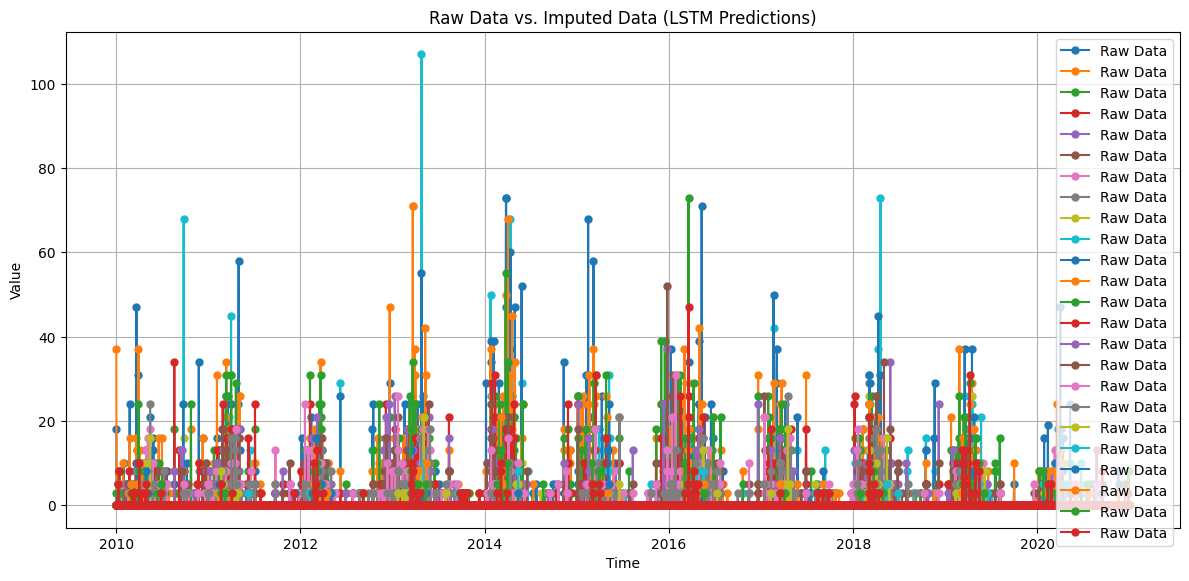

In [49]:
# Graph

import matplotlib.pyplot as plt
# Plot the raw data and the imputed data
plt.figure(figsize=(12, 6))
plt.title("Raw Data vs. Imputed Data (LSTM Predictions)")
plt.xlabel("Time")
plt.ylabel("Value")


# Plot the raw data
plt.plot(df.index, df.values, label="Raw Data", marker='o', markersize=5)


# Plot the imputed data (LSTM predictions)
# plt.plot(imputed_data.index, imputed_data.values, label="Imputed Data (LSTM Predictions)", linestyle='--', marker='o', markersize=5)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
# Define a function to create sequences of data for LSTM
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequence = data[i:i+window_size]
        sequences.append(sequence)
    return np.array(sequences)

In [47]:

# Define window size and create sequences
window_size = 3
sequences = create_sequences(scaled_data, window_size)

# Split the data into training and testing sets
train_size = int(0.8 * len(sequences))
train_data = sequences[:train_size]
test_data = sequences[train_size:]

# Split each sequence into input (X) and target (y) data
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0026
Epoch 2/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 3/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 4/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 5/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 6/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 7/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 8/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 9/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 10/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 11/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0024
Epoch 12/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0024
Epoch 13/100


In [48]:

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions to get actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) as a measure of prediction accuracy
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Use the trained model to impute missing values
imputed_data = df.copy()
imputed_data.iloc[-len(y_pred):] = y_pred

# Print the DataFrame with imputed values
print(imputed_data)

26/26 [==============================] - 0s 1ms/step


ValueError: non-broadcastable output operand with shape (803,1) doesn't match the broadcast shape (803,24)

In [ ]:
y_pred = model.predict(X_test)
y_pred